# Разрабатотка стратегии взаимодействия с клиентами

<div class="alert alert-info" role="alert">

<b>Наша задача:</b>
    
Необходимо разработать стратегию взаимодействия с клиентами на основе аналитических данных в сети фитнес-центров «Культурист-датасаентист», провести анализ и подготовить план действий по удержанию клиентов.
    
<b>Описание данных:</b>
    
'Churn' — факт оттока в текущем месяце;
    
Текущие поля в датасете:
    
Данные клиента за предыдущий до проверки факта оттока месяц:
    
'gender' — пол;
    
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    
'Phone' — наличие контактного телефона;
    
'Age' — возраст;
    
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    
'Group_visits' — факт посещения групповых занятий;
    
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<b>Шаг 1. Загрузим данные и изучим общую информацию </b>

<b>Шаг 2. Проведем исследовательский анализ данных (EDA)</b>
    
Определим в датасете отсутствующие признаки, изучим средние значения и стандартные отклонения;
    
Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
    
Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
    
Построим матрицу корреляций и отобразим её.
    
<b>Шаг 3. Построим модель прогнозирования оттока клиентов</b>    

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
    
Разобьем данные на обучающую и валидационную выборку функцией train_test_split().
    
Обучим модель на train-выборке двумя способами:
    
логистической регрессией и случайным лесом.
    
Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Определим какая модель показала себя лучше на основании метрик.
    
<b>Шаг 4. Сделаем кластеризацию клиентов</b>    
    
Проведем кластеризацию объектов (клиентов):
    
Стандартизируем данные.
    
Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 
    
На основании полученного графика предположим, какое количество кластеров можно выделить.
    
Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 
    
Изучим средние значения признаков для кластеров.
    
Построим распределения признаков для кластеров. 
    
Для каждого полученного кластера посчитаем долю оттока.
    
Определим какие кластеры склонны к оттоку, а какие — надёжны.
    
<b>Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами</b>   
       
Сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с клиентами и их удержания.
    
</div>

# Шаг 1. Загрузим данные и изучим общую информацию

In [1]:
!pip install seaborn -U
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)


In [2]:
df= pd.read_csv("/datasets/gym_churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


### Определим размер датасета

In [3]:
df.shape

(4000, 14)

Датасет представляет собой данные размером 4000 строк х 14 столбцов

In [4]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### Приведем столбцы к типу int

In [5]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null int64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 437.6 KB


### Изучим наши данные датасета

In [7]:
for element in df.columns:
    display(df[element].value_counts())

1    2041
0    1959
Name: gender, dtype: int64

1    3381
0     619
Name: Near_Location, dtype: int64

0    2053
1    1947
Name: Partner, dtype: int64

0    2766
1    1234
Name: Promo_friends, dtype: int64

1    3614
0     386
Name: Phone, dtype: int64

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

0    2351
1    1649
Name: Group_visits, dtype: int64

29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64

135.756722    1
97.623617     1
82.487277     1
17.911351     1
74.882931     1
             ..
163.080276    1
133.640108    1
9.838696      1
134.699410    1
357.046942    1
Name: Avg_additional_charges_total, Length: 4000, dtype: int64

1     2207
6      645
12     524
11     181
5      130
10      82
9       73
4       58
8       38
7       25
3       23
2       14
Name: Month_to_end_contract, dtype: int64

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
14     24
15     24
16     15
17     11
19      7
20      7
18      7
21      5
24      2
22      2
26      2
23      2
29      1
27      1
31      1
Name: Lifetime, dtype: int64

0.000000    88
3.071431     1
3.275314     1
2.687575     1
0.751450     1
            ..
1.801802     1
3.519139     1
1.750208     1
1.315297     1
2.863927     1
Name: Avg_class_frequency_total, Length: 3913, dtype: int64

0.000000    181
2.038709      1
1.202066      1
2.981590      1
2.618891      1
           ... 
1.287944      1
2.349070      1
3.399411      1
0.472735      1
3.720636      1
Name: Avg_class_frequency_current_month, Length: 3820, dtype: int64

0    2939
1    1061
Name: Churn, dtype: int64

Практически равное отношение мужчин и женщин при посещении фитнесс-центра; Большее число клиентов проживает или работает в районе, где находится фитнес-центр; Примерно половина клиентов это сотрудники компании-партнёра клуба; Примерно треть клиентов пришла в рамках акции «приведи друга»; Большая часть клиентов оставили контактний телефон; Основной возраст клиентов клуба 26-32 года; Чуть большеполовины имеют абонемент на месяц; Большая часть клиентов никогда не посящали групповые занятия; 181 человек не посещали фитнесс за предыдущий месяц; Около 1/3 клиетов - отток в текущем месяце.

### Вывод по Шагу 1

Мы загрузили данные датасета посещении фитнесс-центра «Культурист-датасаентист» и получили следующую информацию:
Датасет представляет собой данные размером 4000 строк х 14 столбцов. В исследуемых данных практически равное отношение мужчин и женщин при посещении фитнесс-центра. Большее число клиентов проживает или работает в районе, где находится фитнес-центр. Примерно половина клиентов это сотрудники компании-партнёра клуба. Примерно треть клиентов пришла в рамках акции «приведи друга». Большая часть клиентов оставили контактний телефон. Основной возраст клиентов клуба 26-32 года. Чуть большеполовины имеют абонемент на месяц. Большая часть клиентов никогда не посящали групповые занятия. 181 человек не посещали фитнесс за предыдущий месяц. Около 1/3 клиетов - отток в текущем месяце.

# Шаг 2. Проведем исследовательский анализ данных (EDA)

### Определим в датасете отсутствующие признаки, изучим средние значения и стандартные отклонения

In [8]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


49/51% отношение мужчин и женщин при посещении фитнесс-центра, 

84% - проживание или работа в районе, где находится фитнес-центр; 

49% клиентов это сотрудники компании-партнёра клуба; 

31% клиентов пришла в рамках акции «приведи друга»; 

90% оставили контактний телефон; 

41% посещают групповые занятия; 

29 лет средный возраст клиента и основной возраст посещения 26-32 года; 

Средняя выручка с клиента составляет 147 (у.е.) со стандартнвм отклонением 96 (у.е.);

Средний срок до окончания текущего действующего абонемента составляет 4.3 месяца с отклонением в 4.2 месяца. Это связано с тем что больше половины (2207 клиента) имеют срок окончания 1 месяц или просто абонемент на 1 месяц;

Время с момента первого обращения в фитнес-центр составляет 3.7 месяцев и стандартное отклонение 3.7 месяцев;

Средняя частота посещений в неделю за все время с начала действия абонемента 1.9, стандартное отклонение 1. Связано с большим числом абонементов на 1 месяц;

Средняя частота посещений в неделю за предыдущий месяц составляет 1.8, стандартное отклонение 1. Связано с большим числом абонементов на 1 месяц и числом не посетивших фитнесс - 181 человек.

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
df_0 = df.query('Churn == 0')
df_1 = df.query('Churn != 0')

In [10]:
df_0.mean()

gender                                 0.510037
Near_Location                          0.873086
Partner                                0.534195
Promo_friends                          0.353522
Phone                                  0.903709
Contract_period                        5.747193
Group_visits                           0.464103
Age                                   29.976523
Avg_additional_charges_total         158.445715
Month_to_end_contract                  5.283089
Lifetime                               4.711807
Avg_class_frequency_total              2.024876
Avg_class_frequency_current_month      2.027882
Churn                                  0.000000
dtype: float64

In [11]:
df_1.mean()

gender                                 0.510839
Near_Location                          0.768143
Partner                                0.355325
Promo_friends                          0.183789
Phone                                  0.902922
Contract_period                        1.728558
Group_visits                           0.268615
Age                                   26.989632
Avg_additional_charges_total         115.082899
Month_to_end_contract                  1.662582
Lifetime                               0.990575
Avg_class_frequency_total              1.474995
Avg_class_frequency_current_month      1.044546
Churn                                  1.000000
dtype: float64

In [12]:
df_group_Churn = df.groupby('Churn')['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 
                                        'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
                                        'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'].mean()
df_group_Churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По гендерному различию изменений среди тех кто ушел и тех кто продолжает посещать фитнесс-центр нет;

Среди проживающих или работающих в районе, где находится фитнес-центр доля тех кто ушел немного меньше;

Посетители которые остаются:

Сотрудники компании-партнёра клуба;

Пришедшие в рамках акции «приведи друга»;

С большим текущим действующим абонементом;

Посещающие чаще групповые занятия;

В среднем имеющие возраст 30  лет;

С этих клиентов большая суммарная выручка;

В среднем срок до окончания текущего действующего абонемента чуть более 5 месяцев;

Время с момента первого обращения в фитнес-центр у них больше среднего и составляет 4.7 месяцев;

Средняя частота посещений в неделю за все время с начала действия абонемента у этих клиентов выше и составляет 2 посещения в неделю;

Средняя частота посещений в неделю за предыдущий месяц у этих клиентов выше и составляет 2 посещения в неделю.

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [13]:
df_сhurn = df.groupby(['Age', 'Churn']).agg({'Churn': ['count']}).reset_index()
df_сhurn.columns = ['Age', 'Churn', 'Churn_count']
df_сhurn_0 = df_сhurn.query('Churn == 0')
df_сhurn_1 = df_сhurn.query('Churn != 0')

In [14]:
df_сhurn_0_1= df_сhurn_1.merge(df_сhurn_0, left_on='Age', right_on='Age', how='outer')
df_сhurn_0_1['Churn_x'] = df_сhurn_0_1['Churn_x'].fillna(1)
df_сhurn_0_1 = df_сhurn_0_1.fillna(0)
df_сhurn_0_1.columns = ['Age', 'Churn_1', 'Отток', 'Churn_0', 'Посетители']

In [15]:
df_сhurn_0_1

,Age,Churn_1,Отток,Churn_0,Посетители
0,18,1.0,2.0,0.0,0.0
1,19,1.0,1.0,0.0,1.0
2,20,1.0,11.0,0.0,3.0
3,21,1.0,19.0,0.0,5.0
4,22,1.0,26.0,0.0,7.0
5,23,1.0,56.0,0.0,26.0
6,24,1.0,87.0,0.0,61.0
7,25,1.0,130.0,0.0,101.0
8,26,1.0,133.0,0.0,167.0
9,27,1.0,139.0,0.0,239.0


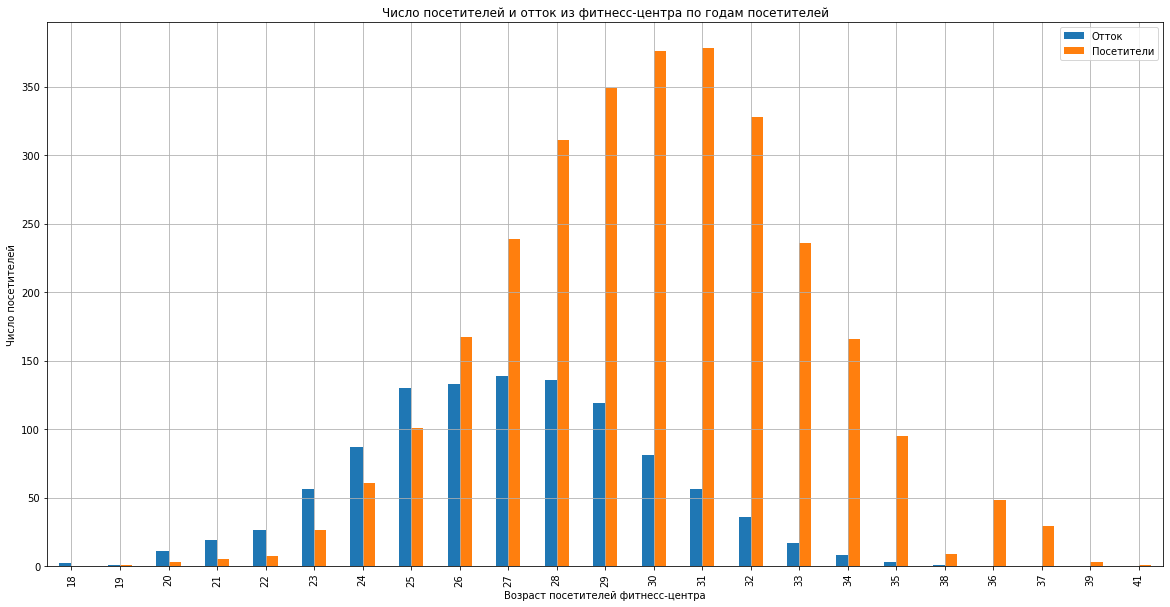

In [16]:
df_сhurn_0_1.plot(kind='bar', y=['Отток','Посетители'], x='Age', grid=True, figsize=(20, 10))
plt.title('Число посетителей и отток из фитнесс-центра по годам посетителей')
plt.ylabel('Число посетителей')
plt.xlabel('Возраст посетителей фитнесс-центра');

На графике видим, что число тех к то попал в отток больше, если возраст посетителя составляет до 26 лет, от 26 лет число тех кто остался в фитнесс-центе намного больше. 

Возраст наибольшего числа посетителей попадающих в отток составляет от 24 до 30 лет, тех кто остался от 26 до 34 лет.

<b>Построим график числа посетителей и оттока из фитнесс-центра по половому признаку

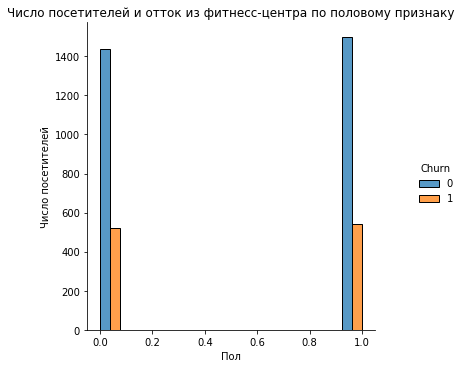

In [17]:
sns.displot(df, x="gender", hue="Churn", multiple="dodge")
plt.title('Число посетителей и отток из фитнесс-центра по половому признаку')
plt.xlabel('Пол')
plt.ylabel('Число посетителей');

По половому признаку не различий в оттоке клиентов

<b>Построим график числа посетителей и оттока из фитнесс-центра проживающих или работающих в районе, где находится фитнес-центр

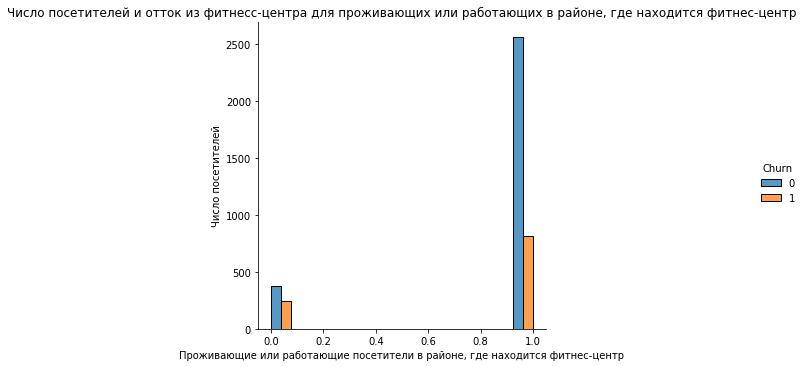

In [18]:
sns.displot(df, x="Near_Location", hue="Churn", multiple="dodge")
plt.title('Число посетителей и отток из фитнесс-центра для проживающих или работающих в районе, где находится фитнес-центр')
plt.xlabel('Проживающие или работающие посетители в районе, где находится фитнес-центр')
plt.ylabel('Число посетителей');

Больший отток посетителей наблюдается у не проживающих или работающих в районе, где находится фитнес-центр

<b>Построим график числа посетителей и оттока из фитнесс-центра для сотрудников компании-партнёра клуба

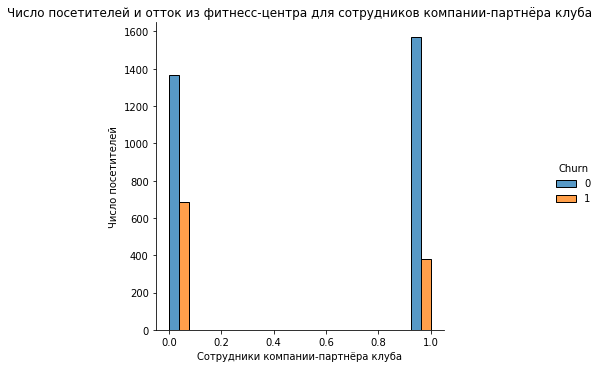

In [19]:
sns.displot(df, x="Partner", hue="Churn", multiple="dodge")
plt.title('Число посетителей и отток из фитнесс-центра для сотрудников компании-партнёра клуба')
plt.xlabel('Сотрудники компании-партнёра клуба')
plt.ylabel('Число посетителей');

Больший отток посетителей наблюдается если посетитель не является сотрудником компании-партнёра клуба

<b>Построим график числа посетителей и оттока из фитнесс-центра для факта первоначальной записи в рамках акции «приведи друга»

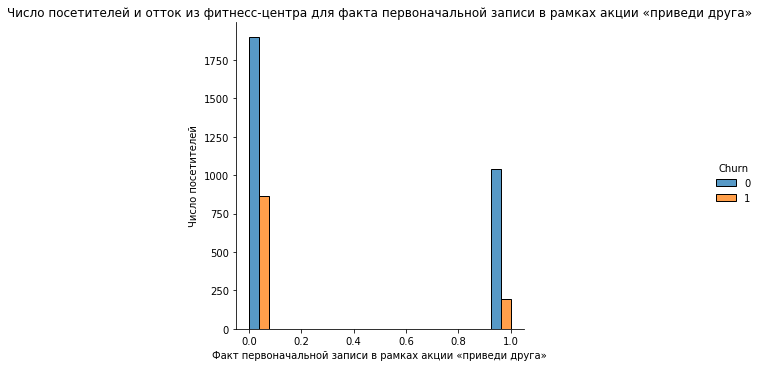

In [20]:
sns.displot(df, x="Promo_friends", hue="Churn", multiple="dodge")
plt.title('Число посетителей и отток из фитнесс-центра для факта первоначальной записи в рамках акции «приведи друга»')
plt.xlabel('Факт первоначальной записи в рамках акции «приведи друга»')
plt.ylabel('Число посетителей');

Больший отток посетителей наблюдается если посетитель не пришел в фитнесс-центр в рамках акции «приведи друга»

<b>Построим график числа посетителей и оттока из фитнесс-центра с наличием контактного телефона

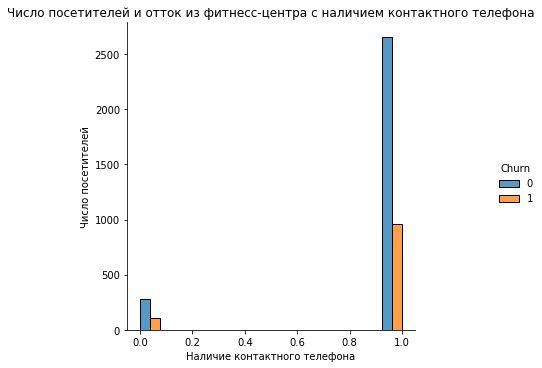

In [21]:
sns.displot(df, x="Phone", hue="Churn", multiple="dodge")
plt.title('Число посетителей и отток из фитнесс-центра с наличием контактного телефона')
plt.xlabel('Наличие контактного телефона')
plt.ylabel('Число посетителей');

Наличие контактного телефона не влияет на отток клиентов

<b>Построим график числа посетителей и оттока из фитнесс-центра по длительности текущего действующего абонемента

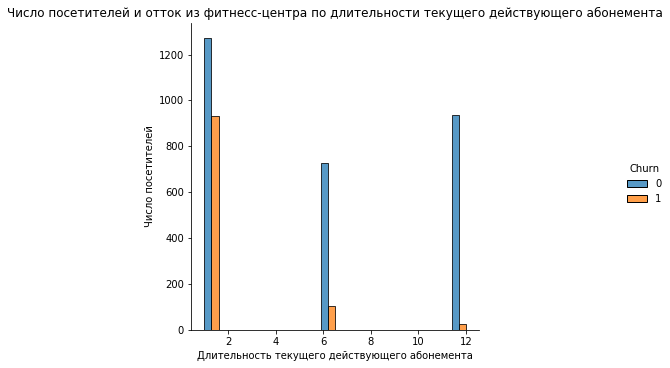

In [22]:
sns.displot(df, x="Contract_period", hue="Churn", multiple="dodge")
plt.title('Число посетителей и отток из фитнесс-центра по длительности текущего действующего абонемента')
plt.xlabel('Длительность текущего действующего абонемента')
plt.ylabel('Число посетителей');

Максимальный отток посетителей наблюдается при длительности текущего абонемента в 1 месяц, минимальный отток при длительности текущего абонемента в 12 месяцев

<b>Построим график числа посетителей и оттока из фитнесс-центра с фактом посещения групповых занятий

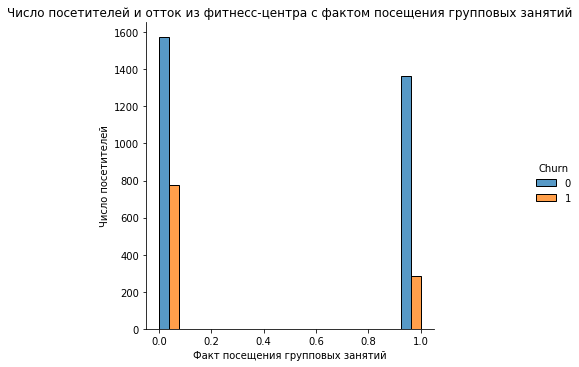

In [23]:
sns.displot(df, x="Group_visits", hue="Churn", multiple="dodge")
plt.title('Число посетителей и отток из фитнесс-центра с фактом посещения групповых занятий')
plt.xlabel('Факт посещения групповых занятий')
plt.ylabel('Число посетителей');

Больший отток посетителей из фитнесс-центра наблюдается если клиент не посещал групповые занятия

<b>Построим график числа посетителей и оттока из фитнесс-центра по суммарной выручке от других услуг фитнес-центра

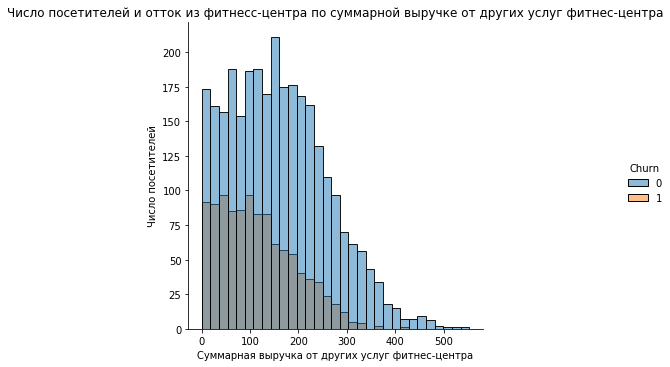

In [24]:
sns.displot(df, x="Avg_additional_charges_total", hue="Churn")
plt.title('Число посетителей и отток из фитнесс-центра по суммарной выручке от других услуг фитнес-центра')
plt.xlabel('Суммарная выручка от других услуг фитнес-центра')
plt.ylabel('Число посетителей');

При тратах до 150 у.е. на услуги фитнес-центра идет равномерный отток посетителей, при увеличении трат, отток начинает равномено падать и при тратах более 300 у.е. отток прекращается

<b>Построим график числа посетителей и оттока из фитнесс-центра со сроком до окончания текущего действующего абонемента

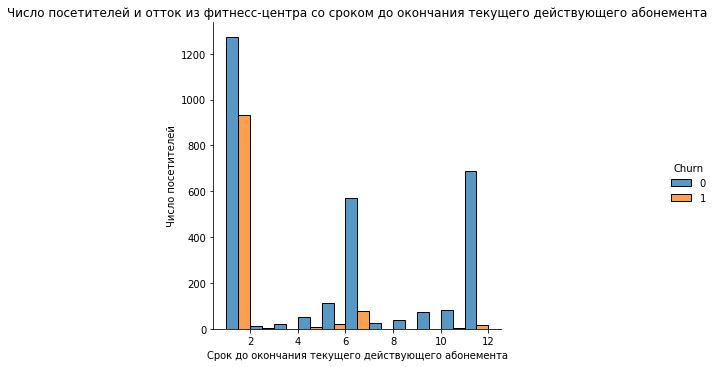

In [25]:
sns.displot(df, x="Month_to_end_contract", hue="Churn", multiple="dodge", binwidth = 1)
plt.title('Число посетителей и отток из фитнесс-центра со сроком до окончания текущего действующего абонемента')
plt.xlabel('Срок до окончания текущего действующего абонемента')
plt.ylabel('Число посетителей');

Больший отток посетителей из фитнесс-центра наблюдается со сроком до окончания текущего действующего абонемента 1 месяц

<b>Построим график числа посетителей и оттока из фитнесс-центра по времени с момента первого обращения в фитнес-центр

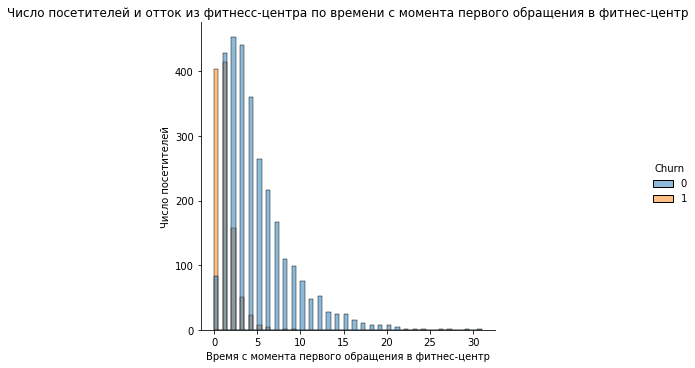

In [26]:
sns.displot(df, x="Lifetime", hue="Churn")
plt.title('Число посетителей и отток из фитнесс-центра по времени с момента первого обращения в фитнес-центр')
plt.xlabel('Время с момента первого обращения в фитнес-центр')
plt.ylabel('Число посетителей');

Максимальный отток наблюдается в течение 2-х месяцев с момента первого обращения в фитнес-центр и далее резко уменьшается. 

<b>Построим график числа посетителей и оттока из фитнесс-центра по средней частоте посещений в неделю за все время с начала действия абонемента

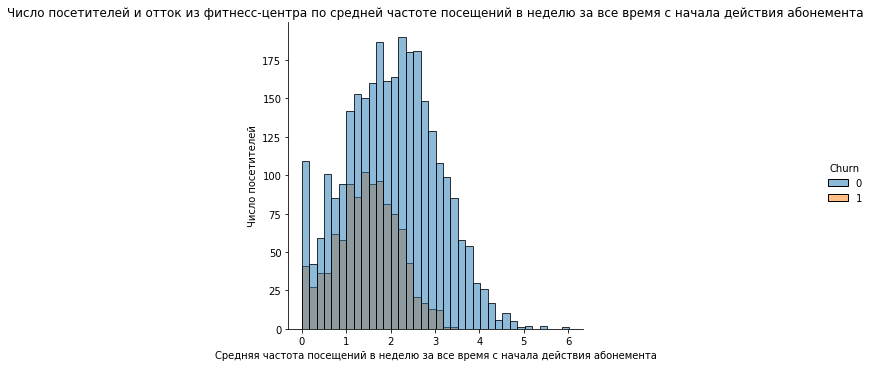

In [27]:
sns.displot(df, x="Avg_class_frequency_total", hue="Churn")
plt.title('Число посетителей и отток из фитнесс-центра по средней частоте посещений в неделю за все время с начала действия абонемента')
plt.xlabel('Средняя частота посещений в неделю за все время с начала действия абонемента')
plt.ylabel('Число посетителей');

Максимальный отток посетителей наблюдается при числе посещений фитнес-центр от 1 до 2-х, для регулярно занимающихся посетителей средняя частота посещений составляет от 1 до 3-х

<b>Построим график числа посетителей и оттока из фитнесс-центра по средней частоте посещений в неделю за предыдущий месяц

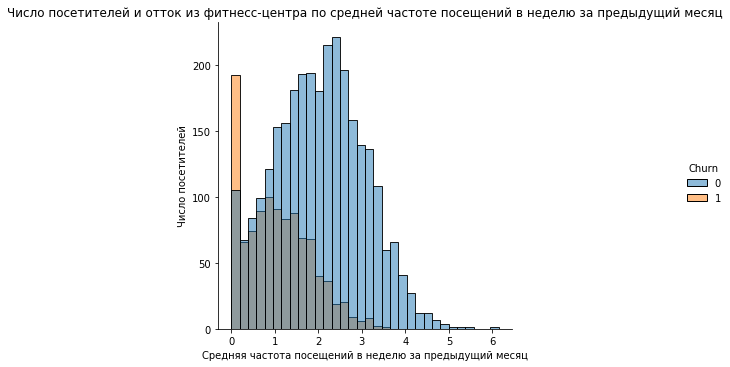

In [28]:
sns.displot(df, x="Avg_class_frequency_current_month", hue="Churn")
plt.title('Число посетителей и отток из фитнесс-центра по средней частоте посещений в неделю за предыдущий месяц')
plt.xlabel('Средняя частота посещений в неделю за предыдущий месяц')
plt.ylabel('Число посетителей');

Максимальный отток посетителей наблюдается при числе посещений фитнес-центр от 1 до 2-х, для регулярно занимающихся посетителей средняя частота посещений составляет от 1 до 3-х

### Построим матрицу корреляций и отобразим её

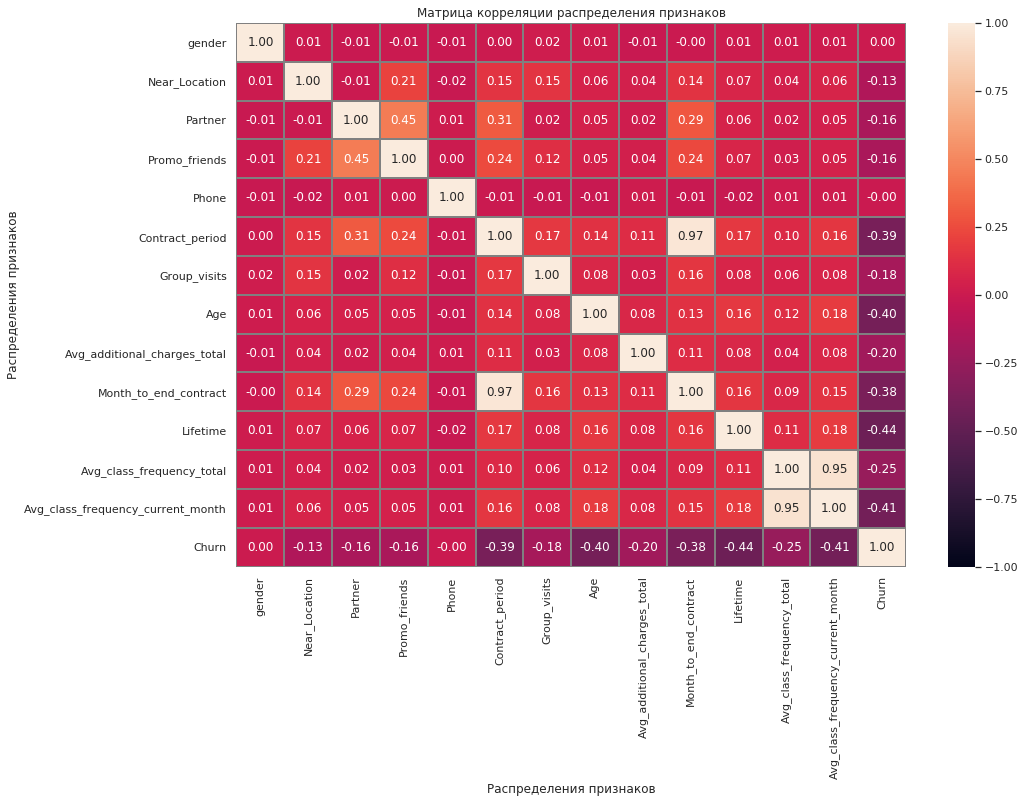

In [29]:
df_corr = df.corr()
sns.set(style='white')
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, linewidths=1, linecolor='gray',vmax = 1, vmin = -1, fmt=".2f"); 
plt.title('Матрица корреляции распределения признаков')
plt.xlabel('Распределения признаков')
plt.ylabel('Распределения признаков');

На матрице корреляции прослеживается зависимость следующих признаков:

Срок до окончания текущего действующего абонемента и длительность текущего действующего абонемента;
Средняя частота посещений в неделю за предыдущий месяц и суммарная выручка от других услуг фитнес-центра.

Небольшая зависимость наблюдается у следующих признаков: факт первоначальной записи в рамках акции «приведи друга» и сотрудник компании-партнёра клуба.

### Вывод по Шагу 2

Мы провели исследовательский анализ данных (EDA) и получили следующие результаты:
49/51% отношение мужчин и женщин при посещении фитнесс-центра,
84% - проживание или работа в районе, где находится фитнес-центр;
49% клиентов это сотрудники компании-партнёра клуба;
31% клиентов пришла в рамках акции «приведи друга»;
90% оставили контактний телефон;
41% посещают групповые занятия;
29 лет средный возраст клиента и основной возраст посещения 26-32 года;
Средняя выручка с клиента составляет 147 (у.е.) со стандартнвм отклонением 96 (у.е.);
Средний срок до окончания текущего действующего абонемента составляет 4.3 месяца с отклонением в 4.2 месяца. Это связано с тем что больше половины (2207 клиента) имеют срок окончания 1 месяц или просто абонемент на 1 месяц;
Время с момента первого обращения в фитнес-центр составляет 3.7 месяцев и стандартное отклонение 3.7 месяцев;
Средняя частота посещений в неделю за все время с начала действия абонемента 1.9, стандартное отклонение 1. Связано с большим числом абонементов на 1 месяц;
Средняя частота посещений в неделю за предыдущий месяц составляет 1.8, стандартное отклонение 1. Связано с большим числом абонементов на 1 месяц и числом не посетивших фитнесс - 181 человек.

По гендерному различию изменений среди тех кто ушел и тех кто продолжает посещать фитнесс-центр нет;
Среди проживающих или работающих в районе, где находится фитнес-центр доля тех кто ушел немного меньше;
Посетители которые остаются:
Сотрудники компании-партнёра клуба;
Пришедшие в рамках акции «приведи друга»;
С большим текущим действующим абонементом;
Посещающие чаще групповые занятия;
В среднем имеющие возраст 30 лет;
С этих клиентов большая суммарная выручка;
В среднем срок до окончания текущего действующего абонемента чуть более 5 месяцев;
Время с момента первого обращения в фитнес-центр у них больше среднего и составляет 4.7 месяцев;
Средняя частота посещений в неделю за все время с начала действия абонемента у этих клиентов выше и составляет 2 посещения в неделю;
Средняя частота посещений в неделю за предыдущий месяц у этих клиентов выше и составляет 2 посещения в неделю.

На графике Числа посетителей и оттока из фитнесс-центра по годам посетителей видим, что число тех к то попал в отток больше, если возраст посетителя составляет до 26 лет, от 26 лет число тех кто остался в фитнесс-центе намного больше. 
Возраст наибольшего числа посетителей попадающих в отток составляет от 24 до 30 лет, тех кто остался от 26 до 34 лет.

На матрице корреляции прослеживается зависимость следующих признаков:
Срок до окончания текущего действующего абонемента и длительность текущего действующего абонемента;
Средняя частота посещений в неделю за предыдущий месяц и суммарная выручка от других услуг фитнес-центра.
Небольшая зависимость наблюдается у следующих признаков: факт первоначальной записи в рамках акции «приведи друга» и сотрудник компании-партнёра клуба.

# Шаг 3. Построим модель прогнозирования оттока клиентов

### Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце: Разобьем данные на обучающую и валидационную выборку функцией train_test_split()

In [30]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [31]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Обучим модель на train-выборке логистической регрессии

In [33]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


### Обучим модель на train-выборке случайным лесом

In [34]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title = 'Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Определим какая модель показала себя лучше на основании метрик

Обучив модель логистической регрессии мы имеем следующие показатели метрик:

    Доля правильных ответов - Accuracy: 0.92;
    Точность - Precision: 0.85;
    Полнота - Recall: 0.83.
    
Для модели случайного леса мы имеем следующие показатели метрик:

    Доля правильных ответов - Accuracy: 0.92;
    Точность - Precision: 0.84;
    Полнота - Recall: 0.81.

По всем показателям метрик модель логистической регрессии оказалась немного лучше.  

### Вывод по Шагу 3

Мы обучили модель логистической регрессии  и модели случайного леса и получили следующие данные:
По всем показателям метрик модель логистической регрессии оказалась немного лучше.

Доля правильных ответов - Accuracy: 0.92;
Точность - Precision: 0.85;
Полнота - Recall: 0.83.

# Шаг 4. Сделаем кластеризацию клиентов

### Стандартизируем данные

In [35]:
df_no_Churn = df.drop(['Churn'], axis=1)
df_no_Churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237


In [36]:
sc = StandardScaler()
x_sc = sc.fit_transform(df_no_Churn)

In [37]:
x_sc

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

In [38]:
linked = linkage(x_sc, method = 'ward') 

In [39]:
print(linked)

[[9.70000000e+01 3.22200000e+03 1.00990653e-01 2.00000000e+00]
 [2.61000000e+02 3.17900000e+03 1.22634574e-01 2.00000000e+00]
 [8.90000000e+02 1.75000000e+03 1.28123291e-01 2.00000000e+00]
 ...
 [7.98700000e+03 7.99500000e+03 8.38725499e+01 2.65600000e+03]
 [7.98800000e+03 7.99600000e+03 8.89563592e+01 3.03400000e+03]
 [7.99200000e+03 7.99700000e+03 1.04627601e+02 4.00000000e+03]]


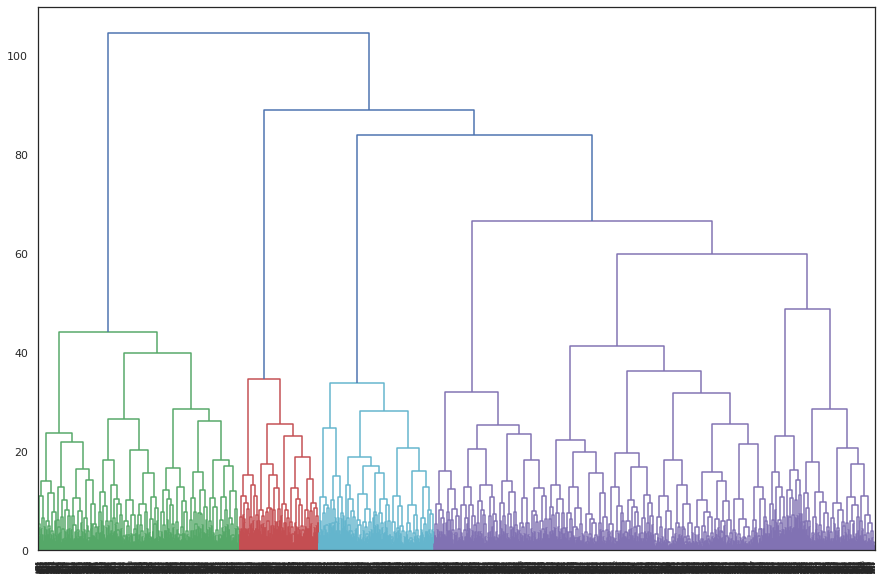

In [40]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

### На основании полученного графика предположим, какое количество кластеров можно выделить.

На основании полученного графика предложенно оптимальное число кластеров 4

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [41]:
sc = StandardScaler()
x_sc = sc.fit_transform(df_no_Churn)

# зададим модель k_means с количеством кластеров 3
km = KMeans(n_clusters = 5, random_state = 0) ### нужен random_state
# спрогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраним метки кластера в поле нашего датасета
df_no_Churn['cluster_km'] = labels

# посчитаем метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.14


Результат значения метрики не очень высокий в виду не четко отделяемых групп

### Изучим средние значения признаков для кластеров

In [42]:
df_no_Churn.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473


Для 0-го кластера характерны следующие максимальные средние значения в признаках: сотрудники компании-партнёра клуба - 78%, факт первоначальной записи в рамках акции «приведи друга» - 57%, длительность текущего действующего абонемента - 10.9 месяцев, факт посещения групповых занятий - 54%, срок до окончания текущего действующего абонемента - 10 месяцев, время с момента первого обращения в фитнес-центр - 4.7 месяцев. 

Для 1-го кластера характерны следующие средние значения в признаках - отсутствие указанного номера телефона, в остальном средние показатели по признакам;

Для 2-го кластера характерны следующие средние значения в признаках - клиент не проживает или работает в районе, где находится фитнес-центр, минимальное число сотрудников компании-партнёра клуба - 8%, минимальное значение факта посещения групповых занятий - 22%

Для 3-го кластера характерны следующие средние значения в признаках - минимальные значения длительности текущего действующего абонемента в 1.9 месяцев, минимальный возраст 28.2 года, минимальный срок до окончания текущего действующего абонемента - 1.9 месяца, минимальное время с момента первого обращения в фитнес-центр - 2.4 месяца, минимальная средняя частота посещений в неделю за все время с начала действия абонемента - 1.2 раза, минимальная средняя частота посещений в неделю за предыдущий месяц - 1 раз;

Для 4-го кластера характерны следующие средние значения в признаках: минимальная запись в рамках акции «приведи друга» - 22% максимальная суммарная выручка от других услуг фитнес-центра - 162 у.е., максимальное время с момента первого обращения в фитнес-центр - 4.9 месяцев, максимальная средняя частота посещений в неделю за все время с начала действия абонемента - 2.9 и максимальная средняя частота посещений в неделю за предыдущий месяц - 2.8;

### Построим распределения признаков для кластеров

Определим наиболее важные признаки 

In [43]:
# обучим финальную модель
final_model = rf_model
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': final_model.feature_importances_}
)
fi_df.sort_values('importance', ascending=False)

,feature,importance
10,Lifetime,0.276499
12,Avg_class_frequency_current_month,0.180170
11,Avg_class_frequency_total,0.129883
7,Age,0.119129
8,Avg_additional_charges_total,0.091473
9,Month_to_end_contract,0.068855
5,Contract_period,0.065964
6,Group_visits,0.015652
0,gender,0.012425
2,Partner,0.012285


Наиболее важными признаками являются в порядке убывания:
Время с момента первого обращения в фитнес-центр, средняя частота посещений в неделю за предыдущий месяц, средняя частота посещений в неделю за все время с начала действия абонемента, возраст, срок до окончания текущего действующего абонемента, суммарная выручка от других услуг фитнес-центра.

Построим распределение признаков для кластеров с учетом их важности

In [44]:
def show_clusters_on_plot(df_no_Churn, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        df_no_Churn[x_name], df_no_Churn[y_name], hue=df_no_Churn[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

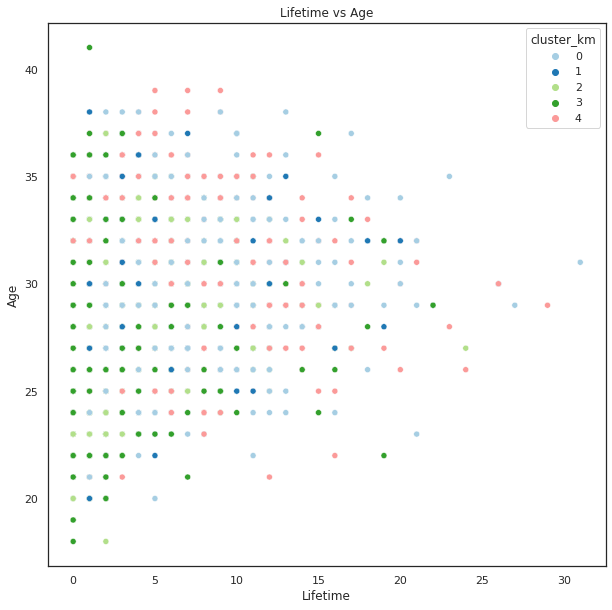

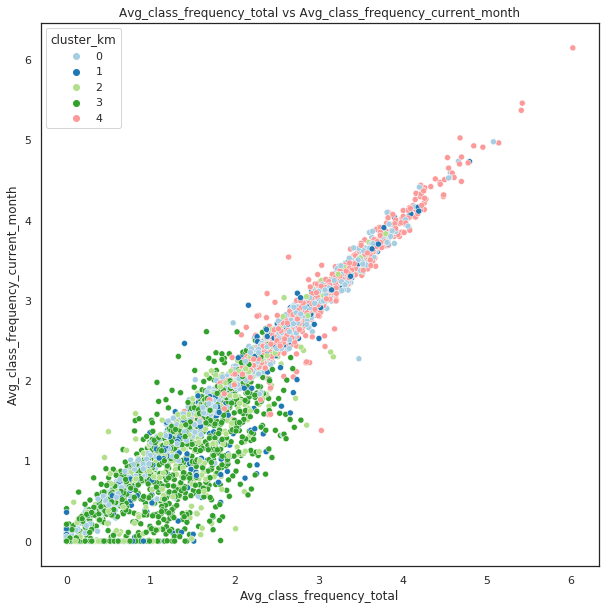

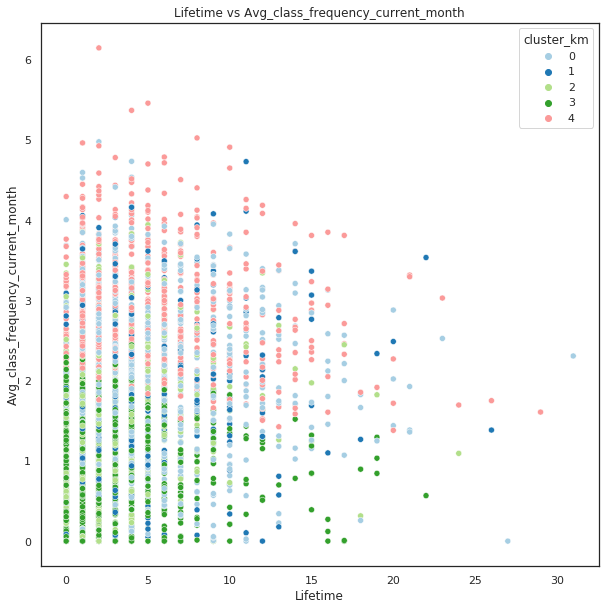

In [45]:
# отрисуем графики для пары признаков "Contract_period" и "Month_to_end_contract"
show_clusters_on_plot(df_no_Churn, 'Lifetime', 'Age', 'cluster_km')
# отрисуем графики для пары признаков "Avg_class_frequency_total" и "Avg_class_frequency_current_month"
show_clusters_on_plot(df_no_Churn, 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'cluster_km')
# отрисуем графики для пары признаков "Lifetime" и "Age"
show_clusters_on_plot(df_no_Churn, 'Lifetime', 'Avg_class_frequency_current_month', 'cluster_km');

<b> Построим распределение посетителей фитнес-центра по половому признаку

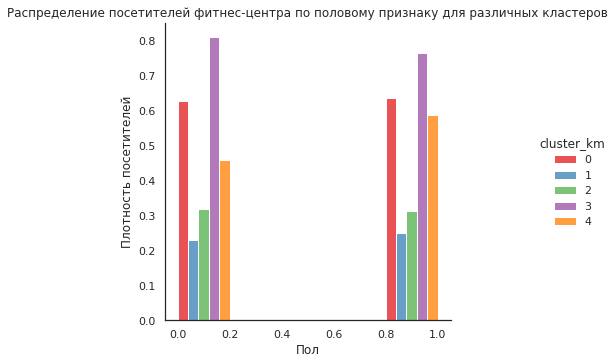

In [46]:
sns.displot(df_no_Churn, x="gender", hue="cluster_km", palette='Set1', binwidth = 0.2, stat = 'density', multiple="dodge")
plt.title('Распределение посетителей фитнес-центра по половому признаку для различных кластеров')
plt.xlabel('Пол')
plt.ylabel('Плотность посетителей');

Равномерное распределение долей посетителей фитнес-центра по половому признаку для различных кластеров

<b> Построим распределение посетителей фитнес-центра проживающих или работающих в районе, где находится фитнес-цент для различных кластеров

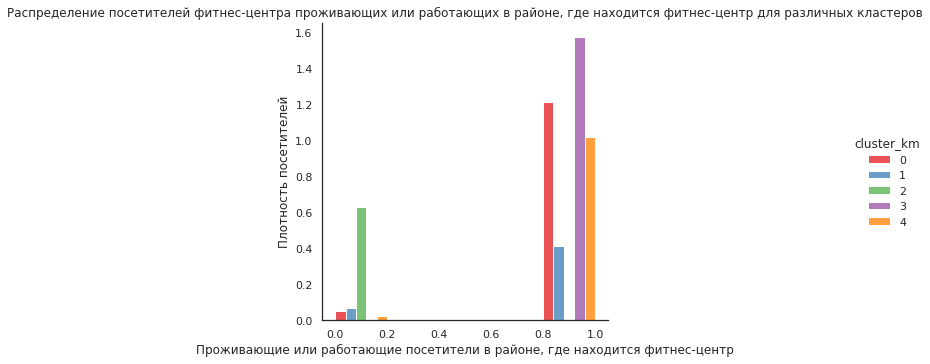

In [47]:
sns.displot(df_no_Churn, x="Near_Location", hue="cluster_km", multiple="dodge", 
            palette='Set1', binwidth = 0.2, stat = 'density')
plt.title('Распределение посетителей фитнес-центра проживающих или работающих в районе, где находится фитнес-центр для различных кластеров')
plt.xlabel('Проживающие или работающие посетители в районе, где находится фитнес-центр')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерна малая доля посетителей фитнес-центра не проживающих или не работающих в районе, где находится фитнес-центр;

Для 1-го кластера характерна малая доля посетителей фитнес-центра не проживающих или не работающих в районе, где находится фитнес-центр;

Для 2-го кластера характерна отсутствие посетителей фитнес-центра проживающих или работающих в районе, где находится фитнес-центр;

Для 3-го кластера характерна отсутствие посетителей фитнес-центра не проживающих или работающих в районе, где находится фитнес-центр;

Для 4-го кластера характерно малая доля посетителей фитнес-центра не проживающих или работающих в районе, где находится фитнес-центр;

<b> Построим распределение посетителей фитнес-центра для сотрудников компании-партнёра клуба </b> 

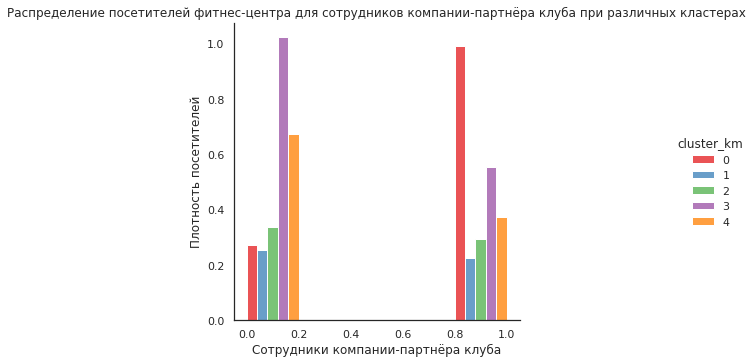

In [48]:
sns.displot(df_no_Churn, x="Partner", hue="cluster_km", multiple="dodge", palette='Set1', binwidth = 0.2, stat = 'density')
plt.title('Распределение посетителей фитнес-центра для сотрудников компании-партнёра клуба при различных кластерах')
plt.xlabel('Сотрудники компании-партнёра клуба')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерна малая доля посетителей фитнес-центра не являющихся сотрудниками компании-партнёра клуба;

Для 1-го и 2-го кластеров характерны равное число долей посетителей фитнес-центра являющиеся сотрудниками компании-партнёра клуба и не являющиеся таковыми;

Для 3-го и 4-го кластеров характерна большая доля посетителей фитнес-центра не являющихся сотрудниками компании-партнёра клуба;

Text(17.209164583333326, 0.5, 'Плотность посетителей')

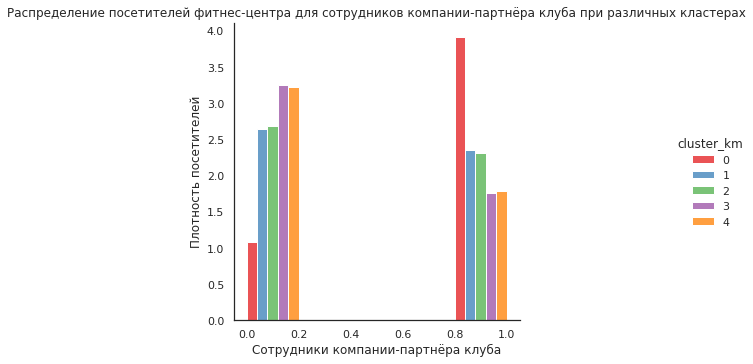

In [68]:
### common_norm=False
sns.displot(df_no_Churn, x="Partner", hue="cluster_km", multiple="dodge", palette='Set1', binwidth = 0.2, stat = 'density', common_norm=False)
plt.title('Распределение посетителей фитнес-центра для сотрудников компании-партнёра клуба при различных кластерах')
plt.xlabel('Сотрудники компании-партнёра клуба')
plt.ylabel('Плотность посетителей')

<b> Построим распределение посетителей фитнес-центра для факта первоначальной записи в рамках акции «приведи друга» 

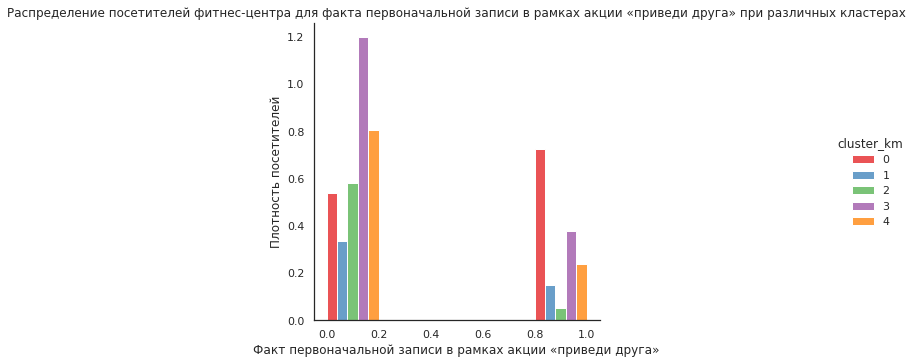

In [49]:
sns.displot(df_no_Churn, x="Promo_friends", hue="cluster_km", multiple="dodge", palette='Set1', binwidth = 0.2, stat = 'density')
plt.title('Распределение посетителей фитнес-центра для факта первоначальной записи в рамках акции «приведи друга» при различных кластерах')
plt.xlabel('Факт первоначальной записи в рамках акции «приведи друга»')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерна большая доля посетителей фитнес-центра с факта первоначальной записи в рамках акции «приведи друга»;

Для 1-го, 2-го, 3-го и 4-го кластеров характерна большая доля посетителей фитнес-центра без факта первоначальной записи в рамках акции «приведи друга»;

<b>Построим распределение посетителей фитнес-центра с наличием контактного телефона

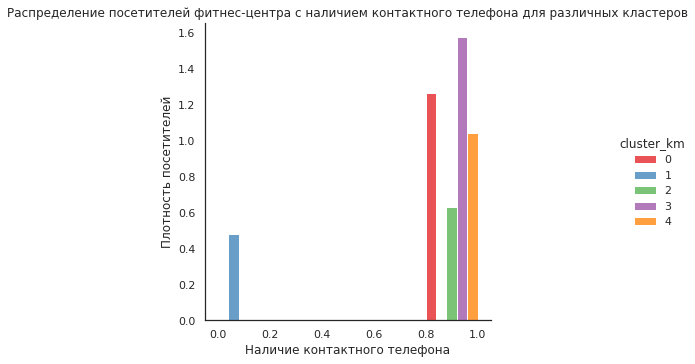

In [50]:
sns.displot(df_no_Churn, x="Phone", hue="cluster_km", multiple="dodge", palette='Set1', binwidth = 0.2, stat = 'density')
plt.title('Распределение посетителей фитнес-центра с наличием контактного телефона для различных кластеров')
plt.xlabel('Наличие контактного телефона')
plt.ylabel('Плотность посетителей');

Все клиенты кластера 1 не оставили номер контактного телефона;

Все клиенты кластеров 0, 2, 3 и 4 оставили номер контактного телефона;

<b>Построим распределение посетителей фитнес-центра с длительностью текущего действующего абонемента 

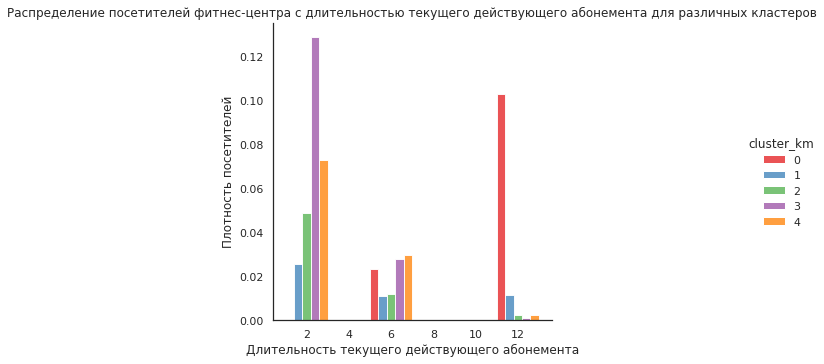

In [51]:
sns.displot(df_no_Churn, x="Contract_period", hue="cluster_km",
            multiple="dodge", palette='Set1', binwidth = 2, stat = 'density')
plt.title('Распределение посетителей фитнес-центра с длительностью текущего действующего абонемента для различных кластеров')
plt.xlabel('Длительность текущего действующего абонемента')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерно отсутствие числа посетителей фитнес-центра с длительностью текущего действующего абонемента 1 месяц;

Для 1-го и 2-го кластеров характерна большая доля посетителей фитнес-центра с длительностью текущего действующего абонемента 1 месяц;

Для 3-го кластера характерно отсутствие числа посетителей фитнес-центра с длительностью текущего действующего абонемента 12 месяцев;

Для 4-го кластера характерна большая доля посетителей фитнес-центра с длительностью текущего действующего абонемента 1 месяц;

<b>Построим распределение посетителей фитнес-центра с фактом посещения групповых занятий

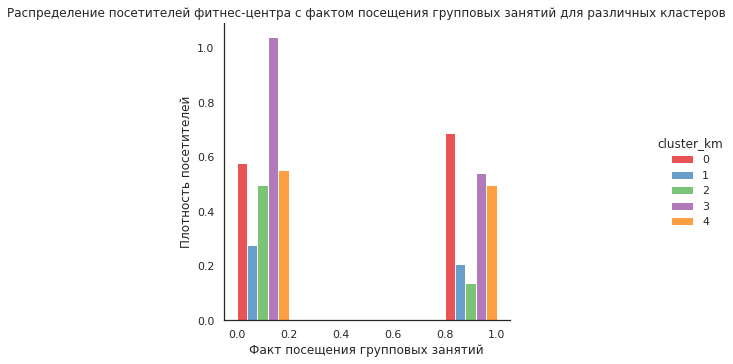

In [52]:
sns.displot(df_no_Churn, x="Group_visits", hue="cluster_km", multiple="dodge", palette='Set1', binwidth = 0.2, stat = 'density')
plt.title('Распределение посетителей фитнес-центра с фактом посещения групповых занятий для различных кластеров')
plt.xlabel('Факт посещения групповых занятий')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерна чуть большая доля посетителей фитнес-центра с факта посещения групповых занятий;

Для 1, 2, 3 и 4 кластеов характерна большая доля посетителей фитнес-центра без факта посещения групповых занятий;

<b>Построим распределение посетителей фитнес-центра по возрасту

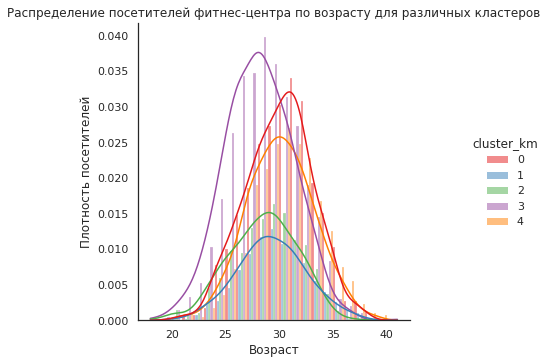

In [53]:
sns.displot(df_no_Churn, x="Age", hue="cluster_km", multiple='dodge', palette='Set1', binwidth = 1, kde=True, stat = 'density')
plt.title('Распределение посетителей фитнес-центра по возрасту для различных кластеров')
plt.xlabel('Возраст')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерна максимальная доля посетителей с возрастом от 30 лет;

Для 1-го кластера характерна минимальная доля посетителей для всех групп возрастов;

Для 3-го кластера характерна максимальная доля посетителей с возрастом до 30 лет;

<b>Построим распределение посетителей фитнес-центра по суммарной выручке от других услуг

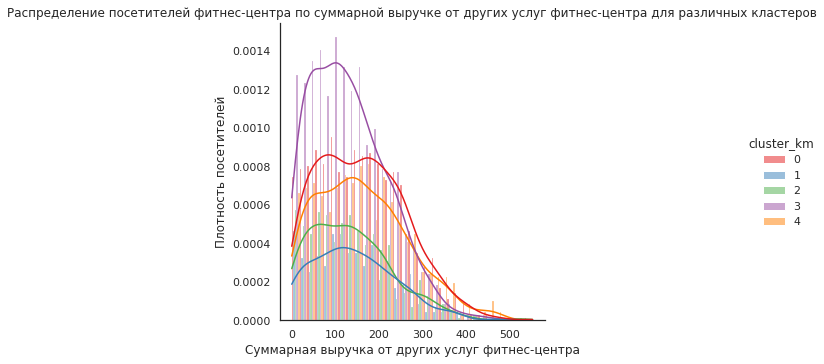

In [54]:
sns.displot(df_no_Churn, x="Avg_additional_charges_total", hue="cluster_km",
            multiple='dodge', palette='Set1', kde=True, stat = 'density')
plt.title('Распределение посетителей фитнес-центра по суммарной выручке от других услуг фитнес-центра для различных кластеров')
plt.xlabel('Суммарная выручка от других услуг фитнес-центра')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерна максимальная доля посетителей с суммарной выручкой от других услуг фитнес-центра от 250 у.е.;

Для 1-го кластера характерна минимальная доля посетителей с суммарной выручкой от других услуг фитнес-центра;

Для 3-го кластера характерна максимальная доля посетителей с суммарной выручкой от других услуг фитнес-центра до 250 у.е.;

<b>Построим распределение посетителей фитнес-центра со сроком до окончания текущего действующего абонемента 

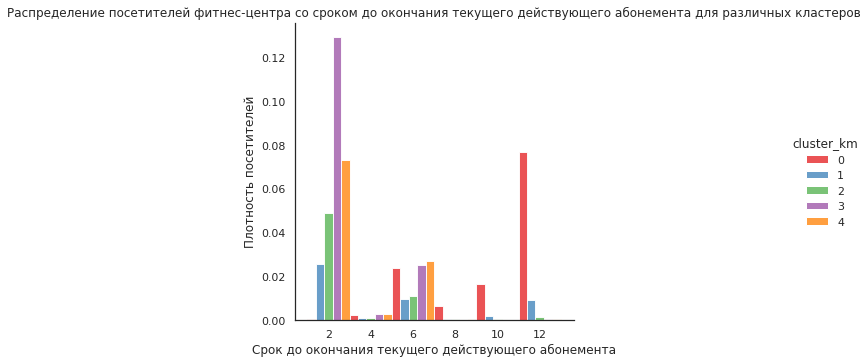

In [55]:
sns.displot(df_no_Churn, x="Month_to_end_contract", hue="cluster_km",
            multiple="dodge", palette='Set1', binwidth = 2, stat = 'density')
plt.title('Распределение посетителей фитнес-центра со сроком до окончания текущего действующего абонемента для различных кластеров')
plt.xlabel('Срок до окончания текущего действующего абонемента')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерна максимальная доля посетителей фитнес-центра с длительностью текущего действующего абонемента 12 месяцев;

Для 1, 2, 3 и 4 кластеров характерна большая доля посетителей фитнес-центра с окончанием срока действия текущего действующего абонемента;

<b>Построим распределение посетителей фитнес-центра по времени с момента первого обращения в фитнес-центр для различных кластеров

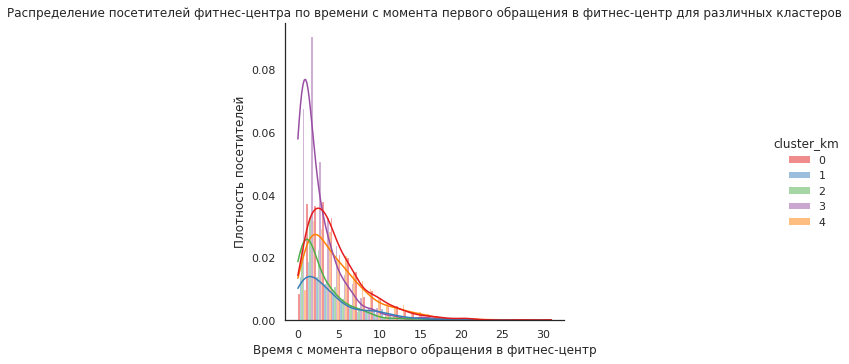

In [56]:
sns.displot(df_no_Churn, x="Lifetime", hue="cluster_km", 
            multiple='dodge', palette='Set1', binwidth = 1, kde=True, stat = 'density')
plt.title('Распределение посетителей фитнес-центра по времени с момента первого обращения в фитнес-центр для различных кластеров')
plt.xlabel('Время с момента первого обращения в фитнес-центр')
plt.ylabel('Плотность посетителей');

Для 0-го кластера характерня максимальная доля посетителей с момента первого обращения в фитнес-центр от 4-х месяцев;

Для 1-го кластера характерна минимальная доля посетителей с момента первого обращения в фитнес-центр;

Для 3-го кластера характерна максимальная доля посетителей с момента первого обращения в фитнес-центр до 4-х месяцев;

<b>Построим распределение посетителей фитнес-центра по средней частоте посещений в неделю за все время с начала действия абонемента

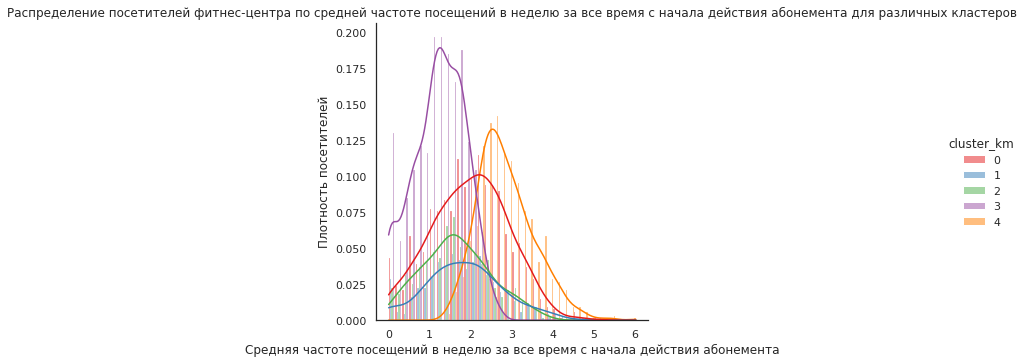

In [57]:
sns.displot(df_no_Churn, x="Avg_class_frequency_total", hue="cluster_km", 
            multiple='dodge', palette='Set1', kde=True, stat = 'density')
plt.title('Распределение посетителей фитнес-центра по средней частоте посещений в неделю за все время с начала действия абонемента для различных кластеров')
plt.xlabel('Средняя частоте посещений в неделю за все время с начала действия абонемента')
plt.ylabel('Плотность посетителей');

Для 1-го кластера характерна минимальная доля посетителей по средней частоте посещений в неделю за все время с начала действия абонемента;

Для 3-го кластера характерна максимальная доля посетителей по средней частоте посещений в неделю за все время с начала действия абонемента до 2-х посещений;

Для 4-го кластера характерна максимальная доля посетителей по средней частоте посещений в неделю за все время с начала действия абонемента от 2-х посещений;

<b>Построим распределение посетителей фитнес-центра по средней частоте посещений в неделю за предыдущий месяц

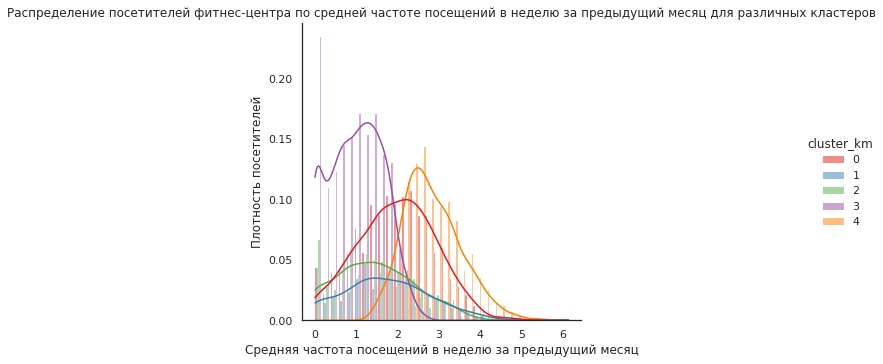

In [58]:
sns.displot(df_no_Churn, x="Avg_class_frequency_current_month", hue="cluster_km",
            multiple='dodge', palette='Set1', kde=True, stat = 'density')
plt.title('Распределение посетителей фитнес-центра по средней частоте посещений в неделю за предыдущий месяц для различных кластеров')
plt.xlabel('Средняя частота посещений в неделю за предыдущий месяц')
plt.ylabel('Плотность посетителей');

Для 1-го кластера характерна минимальная доля посетителей фитнес-центра по средней частоте посещений в неделю за предыдущий месяц;

Для 3-го кластера характерна максимальная доля посетителей фитнес-центра по средней частоте посещений в неделю за предыдущий месяц до 2-х посещений;

Для 4-го кластера характерна максимальная доля посетителей фитнес-центра по средней частоте посещений в неделю за предыдущий месяц от 2-х посещений;

### Для каждого полученного кластера посчитаем долю оттока. Определим какие кластеры склонны к оттоку, а какие — надёжны

In [59]:
data = df.merge(df_no_Churn, left_on=['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 
                      'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                      'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'], right_on=[
    'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 
                       'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                    'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'], how='outer')

In [60]:
df_churn_cluster = data.pivot_table(index="cluster_km", values="Churn", aggfunc = 'mean').sort_values('Churn', ascending=False)
df_churn_cluster

,Churn
cluster_km,
3,0.514263
2,0.443564
1,0.267532
4,0.068100
0,0.027695


Наибольший отток имееет 3-й кластер с долей в 51%, далее идет 2-й кластер сдолей в 44% и 1-й кластер сдолей в 27%. Наименьший отток имеют 4-й и 0-й кластеры с долями отоков 7% и 3%

### Вывод по Шагу 4

На основании полученного графика дендрограммы предложенно оптимальное число кластеров 5.

Для каждого кластера характерны следующие признаки:

Для 0-го кластера характерны следующие максимальные средние значения в признаках: сотрудники компании-партнёра клуба - 78%, факт первоначальной записи в рамках акции «приведи друга» - 57%, длительность текущего действующего абонемента - 10.9 месяцев, факт посещения групповых занятий - 54%, срок до окончания текущего действующего абонемента - 10 месяцев, время с момента первого обращения в фитнес-центр - 4.7 месяцев. 

Для 1-го кластера характерны следующие средние значения в признаках - отсутствие указанного номера телефона, в остальном средние показатели по признакам;

Для 2-го кластера характерны следующие средние значения в признаках - клиент не проживает или работает в районе, где находится фитнес-центр, минимальное число сотрудников компании-партнёра клуба - 8%, минимальное значение факта посещения групповых занятий - 22%

Для 3-го кластера характерны следующие средние значения в признаках - минимальные значения длительности текущего действующего абонемента в 1.9 месяцев, минимальный возраст 28.2 года, минимальный срок до окончания текущего действующего абонемента - 1.9 месяца, минимальное время с момента первого обращения в фитнес-центр - 2.4 месяца, минимальная средняя частота посещений в неделю за все время с начала действия абонемента - 1.2 раза, минимальная средняя частота посещений в неделю за предыдущий месяц - 1 раз;

Для 4-го кластера характерны следующие средние значения в признаках: минимальная запись в рамках акции «приведи друга» - 22% максимальная суммарная выручка от других услуг фитнес-центра - 162 у.е., максимальное время с момента первого обращения в фитнес-центр - 4.9 месяцев, максимальная средняя частота посещений в неделю за все время с начала действия абонемента - 2.9 и максимальная средняя частота посещений в неделю за предыдущий месяц - 2.8;

Наиболее важными признаками являются в порядке убывания:
Время с момента первого обращения в фитнес-центр, средняя частота посещений в неделю за предыдущий месяц, средняя частота посещений в неделю за все время с начала действия абонемента, возраст, срок до окончания текущего действующего абонемента, суммарная выручка от других услуг фитнес-центра.

Наибольший отток имееет 3-й кластер с долей в 51%, далее идет 2-й кластер сдолей в 44% и 1-й кластер сдолей в 27%. Наименьший отток имеют 4-й и 0-й кластеры с долями отоков 7% и 3%

# Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

<div class="alert alert-info" role="alert">

<b>Наша задача:</b>
    
Мы разработали стратегию взаимодействия с клиентами на основе аналитических данных в сети фитнес-центров «Культурист-датасаентист», провели анализ и подготовили план действий по удержанию клиентов.
    
<b>Шаг 1. Загрузили данные и изучили общую информацию </b>

<b>Шаг 2. Провели исследовательский анализ данных (EDA)</b>
    
Определили в датасете отсутствующие признаки, изучили средние значения и стандартные отклонения;
    
Посмотрели на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
    
Построили столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
    
Построили матрицу корреляций и отобразили её.
    
<b>Шаг 3. Построили модель прогнозирования оттока клиентов</b>    

Построили модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
    
Разбили данные на обучающую и валидационную выборки функций train_test_split().
    
Обучили модель на train-выборке двумя способами:
    
логистической регрессией и случайным лесом.
    
Оценили метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнили по ним модели. Определили какая модель показала себя лучше на основании метрик.
    
<b>Шаг 4. Сделаем кластеризацию клиентов</b>    
    
Провели кластеризацию объектов (клиентов):
    
Стандартизировали данные.
    
Построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовали дендрограмму. 
    
На основании полученного графика выделили количество кластеров.
    
Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов. 
    
Изучили средние значения признаков для кластеров.
    
Построили распределения признаков для кластеров. 
    
Для каждого полученного кластера посчитали долю оттока.
    
Определили какие кластеры склонны к оттоку, а какие — надёжны.
    
<b>Шаг 5. Сформулировали выводы и сделали базовые рекомендации по работе с клиентами</b>   
       
<b>Выводы:</b>   
    
Мы загрузили данные датасета посещении фитнесс-центра «Культурист-датасаентист» и получили следующую информацию: Датасет представляет собой данные размером 4000 строк х 14 столбцов. В исследуемых данных практически равное отношение мужчин и женщин при посещении фитнесс-центра. Большее число клиентов проживает или работает в районе, где находится фитнес-центр. Примерно половина клиентов это сотрудники компании-партнёра клуба. Примерно треть клиентов пришла в рамках акции «приведи друга». Большая часть клиентов оставили контактний телефон. Основной возраст клиентов клуба 26-32 года. Чуть большеполовины имеют абонемент на месяц. Большая часть клиентов никогда не посящали групповые занятия. 181 человек не посещали фитнесс за предыдущий месяц. Около 1/3 клиетов - отток в текущем месяце.
    
Мы провели исследовательский анализ данных (EDA) и получили следующие результаты: 49/51% отношение мужчин и женщин при посещении фитнесс-центра, 84% - проживание или работа в районе, где находится фитнес-центр; 49% клиентов это сотрудники компании-партнёра клуба; 31% клиентов пришла в рамках акции «приведи друга»; 90% оставили контактний телефон; 41% посящают групповые занятия; 29 лет средный возраст клиента и основной возраст посещения 26-32 года; Средняя выручка с клиента составляет 147 (у.е.) со стандартнвм отклонением 96 (у.е.); Средний срок до окончания текущего действующего абонемента составляет 4.3 месяца с отклонением в 4.2 месяца. Это связано с тем что больше половины (2207 клиента) имеют срок окончания 1 месяц или просто абонемент на 1 месяц; Время с момента первого обращения в фитнес-центр составляет 3.7 месяцев и стандартное отклонение 3.7 месяцев; средняя частота посещений в неделю за все время с начала действия абонемента 1.9, стандартное отклонение 1. Связано с большим числом абонементов на 1 месяц; Средняя частота посещений в неделю за предыдущий месяц составляет 1.8, стандартное отклонение 1. Связано с большим числом абонементов на 1 месяц и числом не посетивших фитнесс - 181 человек.

По гендерному различию изменений среди тех кто ушел и тех кто продолжает посещать фитнесс-центр нет; Среди проживающих или работающих в районе, где находится фитнес-центр доля тех кто ушел немного больше; Посетители которые чаще уходят в отток: Сотрудники компании-партнёра клуба; Пришедшие в рамках акции «приведи друга»; С большим текущим действующим абонементом; Посещающие чаще групповые занятия; В среднем имеющие возраст 30 лет; С этих клиентов большая суммарная выручка; В среднем срок до окончания текущего действующего абонемента чуть более 5 месяцев; Время с момента первого обращения в фитнес-центр у них больше среднего и составляет 4.7 месяцев; Средняя частота посещений в неделю за все время с начала действия абонемента у этих клиентов выше и составляет 2 посещения в неделю; Средняя частота посещений в неделю за предыдущий месяц у этих клиентов выше и составляет 2 посещения в неделю.

На графике Числа посетителей и оттока из фитнесс-центра по годам посетителей видим, что число тех к то попал в отток больше, если возраст посетителя составляет до 26 лет, от 26 лет число тех кто остался в фитнесс-центе намного больше. Возраст наибольшего числа посетителей попадающее в отток составляет от 24 до 30 лет, тех кто остался от 26 до 34 лет.

На матрице корреляции прослеживается зависимость следующих признаков: Срок до окончания текущего действующего абонемента и длительность текущего действующего абонемента; Средняя частота посещений в неделю за предыдущий месяц и суммарная выручка от других услуг фитнес-центра. Небольшая зависимость наблюдается у следующих признаков: факт первоначальной записи в рамках акции «приведи друга» и сотрудник компании-партнёра клуба.    
    
Мы обучили модель логистической регрессии и модели случайного леса и получили следующие данные: По всем показателям метрик модель логистической регрессии оказалась немного лучше.

Доля правильных ответов - Accuracy: 0.93; Точность - Precision: 0.86; Полнота - Recall: 0.83.    
    
На основании полученного графика дендрограммы предложенно оптимальное число кластеров 4.

Для каждого кластера характерны следующие признаки:

Для 0-го кластера характерны следующие максимальные средние значения в признаках: сотрудники компании-партнёра клуба - 78%, факт первоначальной записи в рамках акции «приведи друга» - 57%, длительность текущего действующего абонемента - 10.9 месяцев, факт посещения групповых занятий - 54%, срок до окончания текущего действующего абонемента - 10 месяцев, время с момента первого обращения в фитнес-центр - 4.7 месяцев. 

Для 1-го кластера характерны следующие средние значения в признаках - отсутствие указанного номера телефона, в остальном средние показатели по признакам;

Для 2-го кластера характерны следующие средние значения в признаках - клиент не проживает или работает в районе, где находится фитнес-центр, минимальное число сотрудников компании-партнёра клуба - 8%, минимальное значение факта посещения групповых занятий - 22%

Для 3-го кластера характерны следующие средние значения в признаках - минимальные значения длительности текущего действующего абонемента в 1.9 месяцев, минимальный возраст 28.2 года, минимальный срок до окончания текущего действующего абонемента - 1.9 месяца, минимальное время с момента первого обращения в фитнес-центр - 2.4 месяца, минимальная средняя частота посещений в неделю за все время с начала действия абонемента - 1.2 раза, минимальная средняя частота посещений в неделю за предыдущий месяц - 1 раз;

Для 4-го кластера характерны следующие средние значения в признаках: минимальная запись в рамках акции «приведи друга» - 22% максимальная суммарная выручка от других услуг фитнес-центра - 162 у.е., максимальное время с момента первого обращения в фитнес-центр - 4.9 месяцев, максимальная средняя частота посещений в неделю за все время с начала действия абонемента - 2.9 и максимальная средняя частота посещений в неделю за предыдущий месяц - 2.8;

Наиболее важными признаками являются в порядке убывания:
Время с момента первого обращения в фитнес-центр, средняя частота посещений в неделю за предыдущий месяц, средняя частота посещений в неделю за все время с начала действия абонемента, возраст, срок до окончания текущего действующего абонемента, суммарная выручка от других услуг фитнес-центра.

Наибольший отток имееет 3-й кластер с долей в 51%, далее идет 2-й кластер сдолей в 44% и 1-й кластер сдолей в 27%. Наименьший отток имеют 4-й и 0-й кластеры с долями отоков 7% и 3%
    
<b>Базовые рекомендации по работе с клиентами:
    
Портрет клиента, который собирается покинуть фитнес-центр:
    
Скорее всего этот клиент пришел в фитнес не по приглашению в рамках акции «приведи друга», длительность текущего действующего абонемента составляет менее 2-х месяцев, данный клиент не посещает групповые занятия, суммарная выручка от других услуг фитнес-центра - 116 у.е., средняя частота посещений в неделю за предыдущий месяц - 1 раз. 

Для того, чтобы оставить такого клиента, необходимо предложить ему продление абонемента при его окончании за 2-3 месяца, увеличить среднюю частоту посещений путем вовлечения в групповые занятия, также предложить данному клиенту дополнительные услуги: кафе, спорт-товары, косметический и массажный салон, для увеличения суммарной выручки от других услуг фитнес-центра<b>
    
    
</div>